In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#Generating The Great Army of Achiles
#It consists of Hundred Great Solders
n = 100
cadit_id = np.arange(1,n+1)
age = np.random.randint(20,40,size=n)
salary = np.random.randint(25000,70000,size=n)
type_of_solder = np.random.choice(["Swords_Men","Archer","Horse_men","Sheild_maidens"],size=n)
kills = np.random.randint(10,25,size=n)
medals = 0


In [3]:
#Achiles Decided to make a Data Frame to give them salaries in an organized way
data = {
    "solder_id":cadit_id,
    "age":age,
    "salary":salary,
    "solder_type":type_of_solder,
    "kills":kills,
    "medals":medals
}
army = pd.DataFrame(data)
army = army.set_index("solder_id")


In [4]:
#There is a problem arising in the army,Swords men and shield madiens started asking more money because 
#the have more risk of death
army
#so our hero decided to give salaries according to the Type
#S M = 60000 , SH M = 60000 , ar = 45000 ,H M = 45000
army.loc[(army["solder_type"] == "Swords_Men"),"salary"] = 60000
army.loc[(army["solder_type"] == "Sheild_maidens"),"salary"] = 60000
army.loc[(army["solder_type"] == "Horse_men"),"salary"] = 40000
army.loc[(army["solder_type"] == "Archer"),"salary"] = 40000

#After the firt incident,solders who did more kills asking More salary So achilles decided to increase
#there salary according kills
army.loc[(army["salary"]<=40000)&(army["kills"]>=15),"salary"] = 55000
army.loc[(army["salary"]<=40000)&(army["kills"]>=20),"salary"] = 65000
army.head(10)

#After salary issues were fixed the king wants to appricate the people who did more than 23 kills 
#so wants to honourable medel
army.loc[army["kills"]>=23,"medals"] = army["medals"] + 1
print("The Total Enimes died in the War:",sum(army["kills"]))

army.sort_values(by="salary",ascending=True)

The Total Enimes died in the War: 1654


,age,salary,solder_type,kills,medals
solder_id,,,,,
7,39,40000,Horse_men,12,0
8,33,40000,Archer,11,0
10,28,40000,Archer,12,0
31,30,40000,Horse_men,13,0
27,30,40000,Archer,12,0
...,...,...,...,...,...
72,22,60000,Swords_Men,11,0
90,34,60000,Sheild_maidens,24,1
92,32,60000,Swords_Men,10,0


<function matplotlib.pyplot.show(close=None, block=None)>

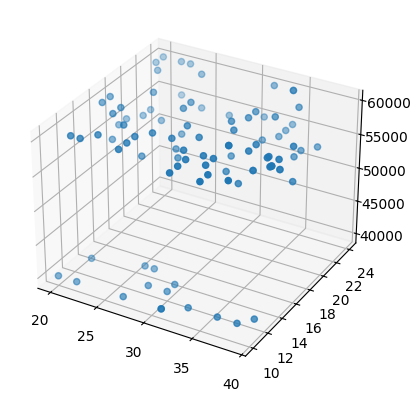

In [5]:
#Now King want's to see the salary distribution so you have to show him in a 3d graph
army.sort_values("salary",inplace = True)
dis = plt.axes(projection = "3d")
dis.scatter(army["age"],army["kills"],army["salary"])
plt.show